In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from scipy.special import wofz
import os
os.chdir("../")
from Lineshape import *


j:\Users\Devin\Desktop\Spin Physics Work\ANN Github\NMR-Fermilab\ANN-NMR\NM4_Fermilab


In [2]:
# df = pd.read_csv("2024-02-07_18h45m11s-RawSignal.csv",header = None) ### Good event file
# df = pd.read_csv("2024-02-08_18h10m52s-RawSignal.csv",header = None)

# df = df.drop(columns=[0])
x = np.linspace(210,216,500)

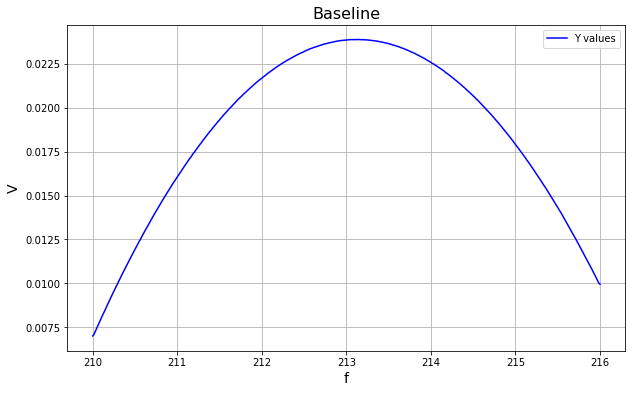

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(x, df.iloc[2], linestyle='-', color='b', label='Y values')
plt.title('Baseline', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid(True)
plt.legend()

In [71]:
degree = 2
coefficients = np.polyfit(x, df.iloc[2], degree)
p = np.poly1d(coefficients)


print("Fitted polynomial equation:")
print(p)

Fitted polynomial equation:
           2
-0.001717 x + 0.732 x - 77.99


In [2]:
"Fitted polynomial equation: -0.001717 x**2 + 0.732 x - 77.99"

'Fitted polynomial equation: -0.001717 x**2 + 0.732 x - 77.99'

In [3]:
def Voigt(x, amp, s, g, x0):
    z = (x - x0 + 1j * g) / (s * np.sqrt(2.0))
    v = wofz(z)  # Faddeeva function for Voigt profile
    out = amp * (np.real(v) / (s * np.sqrt(2 * np.pi)))
    return out

def FrequencyBound(f):
    fit_start_bin, fit_end_bin = 0, 500

    bin_to_freq = 0.0015287  # MHz per bin
    start_freq = f  

    x_full_bins = np.arange(500)  
    x_full_freq = start_freq + x_full_bins * bin_to_freq 

    x_bins = x_full_bins[fit_start_bin:fit_end_bin+1]
    x_freq = x_full_freq[fit_start_bin:fit_end_bin+1]

    return x_full_freq,  x_full_freq[0], x_full_freq[-1]

In [72]:
# U = 2.4283e1 + np.random.uniform(-0.01, 0.01)
U = 2.4283 + np.random.uniform(-0.01, 0.01)
Cknob = .0647 + np.random.uniform(-0.005, 0.005)
cable = 22/2
eta = 1.04e-2 + np.random.uniform(-0.001, 0.001)
phi = 6.1319 + np.random.uniform(-0.1, 0.1)
Cstray = 10**(-15)
shift = -2.0464e-2 + np.random.uniform(-0.001, 0.001)

sig = 0.1 + np.random.uniform(-0.009, 0.001)       
gam = 0.1 + np.random.uniform(-0.009, 0.001)         
amp = .005 + np.random.uniform(-0.005, 0.01)
center = 213 + np.random.uniform(-.1, .1)

# x, lower_bound, upper_bound = FrequencyBound(212.6)
x = np.linspace(210,216,500)

signal = Voigt(x, amp, sig, gam, center)

baseline = Baseline(x, U, Cknob, eta, cable, Cstray, phi, shift)
noise = np.random.normal(0, 0.0005, size=x.shape)
# baseline = (-0.001717*x**2 + 0.732*x - 77.99) 

combined_signal = signal + baseline

noisy_signal = combined_signal + noise

offset = np.array([x - min(noisy_signal) for x in noisy_signal])

C:\Users\Devin\AppData\Local\Temp\ipykernel_31820\3524889706.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


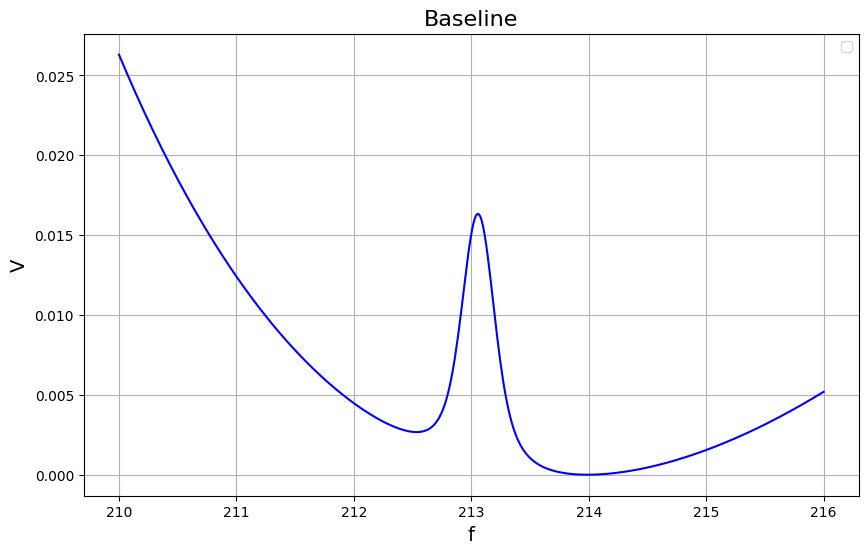

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(x, offset, linestyle='-', color='b')
plt.title('Baseline', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid(True)
plt.legend()

In [239]:
print(baseline2 - baseline1)

[-0.00089379 -0.00090542 -0.00091702 -0.00092858 -0.00094011 -0.0009516
 -0.00096306 -0.00097448 -0.00098587 -0.00099722 -0.00100853 -0.00101981
 -0.00103106 -0.00104226 -0.00105344 -0.00106458 -0.00107568 -0.00108674
 -0.00109777 -0.00110877 -0.00111973 -0.00113065 -0.00114153 -0.00115238
 -0.0011632  -0.00117398 -0.00118472 -0.00119542 -0.00120609 -0.00121673
 -0.00122732 -0.00123788 -0.00124841 -0.00125889 -0.00126935 -0.00127976
 -0.00129014 -0.00130048 -0.00131078 -0.00132105 -0.00133128 -0.00134147
 -0.00135163 -0.00136175 -0.00137183 -0.00138188 -0.00139189 -0.00140186
 -0.00141179 -0.00142169 -0.00143155 -0.00144137 -0.00145116 -0.00146091
 -0.00147062 -0.00148029 -0.00148992 -0.00149952 -0.00150908 -0.0015186
 -0.00152809 -0.00153753 -0.00154694 -0.00155631 -0.00156565 -0.00157494
 -0.0015842  -0.00159342 -0.0016026  -0.00161174 -0.00162084 -0.00162991
 -0.00163894 -0.00164793 -0.00165688 -0.00166579 -0.00167466 -0.0016835
 -0.0016923  -0.00170105 -0.00170977 -0.00171846 -0.00